In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import glob
%matplotlib inline

In [2]:
IMG_SHAPE = 128
BATCH_SIZE = 64
EPOCHS = 50

In [3]:
def load_dataset():
    X = []
    y = []
    for path in glob.glob('normaltrucks/*.jpg'):
        img = tf.keras.preprocessing.image.load_img(path)
        img = tf.keras.preprocessing.image.smart_resize(tf.keras.preprocessing.image.img_to_array(img)/255.0,(IMG_SHAPE,IMG_SHAPE))
        X.append(img)
        y.append([0])
    for path in glob.glob('overtrucks/*.jpg'):
        img = tf.keras.preprocessing.image.load_img(path)
        img = tf.keras.preprocessing.image.smart_resize(tf.keras.preprocessing.image.img_to_array(img)/255.0,(IMG_SHAPE,IMG_SHAPE))
        X.append(img)
        y.append([1])
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y

In [4]:
X, y = load_dataset()
X.shape, y.shape

((148, 128, 128, 3), (148, 1))

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
X_train.shape, y_train.shape

((118, 128, 128, 3), (118, 1))

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((IMG_SHAPE,IMG_SHAPE,3)),
    tf.keras.applications.MobileNet(include_top=False, weights='imagenet'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation=tf.keras.layers.LeakyReLU(0.01)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(1e-4), metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Function (None, None, None, 1024)  3228864   
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                1048640   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 4,277,569
Trainable params: 4,255,681
Non-trainable params: 21,888
_________________________________________________________________


In [ ]:
hist = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2, validation_batch_size=8, shuffle=True)

Epoch 1/50
2/2 [==============================] - 7s 2s/step - loss: 1.1722 - accuracy: 0.5705 - val_loss: 2.9821 - val_accuracy: 0.3333
Epoch 2/50
2/2 [==============================] - 4s 1s/step - loss: 0.2095 - accuracy: 0.9030 - val_loss: 1.6889 - val_accuracy: 0.5417
Epoch 3/50
2/2 [==============================] - 4s 1s/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.8761 - val_accuracy: 0.7083
Epoch 4/50
2/2 [==============================] - 4s 1s/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.5254 - val_accuracy: 0.7917
Epoch 5/50
2/2 [==============================] - 4s 1s/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.3680 - val_accuracy: 0.8750
Epoch 6/50
2/2 [==============================] - 4s 2s/step - loss: 0.0178 - accuracy: 0.9929 - val_loss: 0.3034 - val_accuracy: 0.8333
Epoch 7/50
2/2 [==============================] - 4s 1s/step - loss: 9.8265e-04 - accuracy: 1.0000 - val_loss: 0.2795 - val_accuracy: 0.8333
Epoch 8/50
2/2 [=====================

In [20]:
def predict(path):
    img = tf.keras.preprocessing.image.load_img(path)
    img = tf.keras.preprocessing.image.smart_resize(tf.keras.preprocessing.image.img_to_array(img)/255.0,(IMG_SHAPE,IMG_SHAPE))
    pred = model.predict(np.array([img]))[0]
    plt.imshow(img)
    if (pred >= 0.6):
        plt.title('Truck is overloaded')
    elif (pred > 0.4) and (pred < 0.6):
        plt.title("Not Sure")
    else:
        plt.title("Truck is not Overloaded")
    plt.show()

In [9]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 1s 1s/step - loss: 0.1745 - accuracy: 0.9000


[0.17452029883861542, 0.8999999761581421]

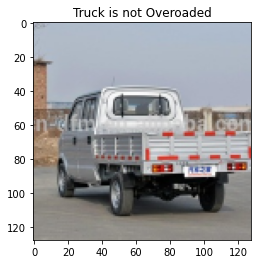

In [10]:
predict('normaltrucks/01-NT.jpg')

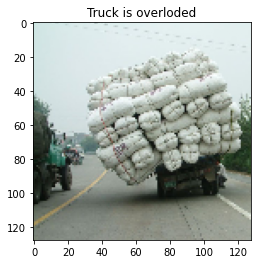

In [11]:
predict('overtrucks/02-OT.jpg')

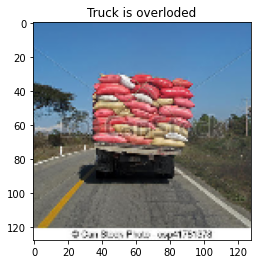

In [12]:
predict('overtrucks/68-OT.jpg')

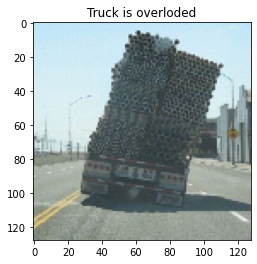

In [13]:
predict('overtrucks/84-OT.jpg')

In [23]:
import tkinter as tk
from tkinter import filedialog
from tkinter.filedialog import askopenfile
from PIL import Image, ImageTk
my_w = tk.Tk()
my_w.geometry("430x500")
my_w.title('Prototype')
my_font1=('times', 18, 'bold')
l1 = tk.Label(my_w,text='Add any photo of a commercial vehicle',width=30,font=my_font1)  
l1.grid(row=1,column=1)
b1 = tk.Button(my_w, text='Upload File', 
   width=20,command = lambda:upload_file())
b1.grid(row=2,column=1) 

def upload_file():
    global img, path
    f_types = [('testing', '*.jpg')]
    filename = filedialog.askopenfilename(filetypes=f_types)
    img = ImageTk.PhotoImage(file=filename)
    #path = filedialog.askopenfilename(initialdir=os.getcwd())
    predict(filename)
    b2 =tk.Button(my_w,image=img)
    b2.grid(row=3,column=1)

my_w.mainloop()